In [62]:
import pandas as pd
import numpy as np
from typing import Dict
import shap
import tqdm
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from data import load_dataset

In [63]:
RANDOM_STATE = 123

In [64]:
models : Dict[str, BaseEstimator] = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=RANDOM_STATE),
    "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "SVC": SVC(random_state=RANDOM_STATE),
    "MLP": Pipeline([('scaler', MinMaxScaler()), ("MLP", MLPClassifier(random_state=RANDOM_STATE, max_iter=300))]),
    "KNN": KNeighborsClassifier(),
}

In [65]:
X, y = load_dataset()
# For shap library we need numericals, not logicals
X = X.astype(float)
# shap requires numerical target variable
y = LabelEncoder().fit_transform(y)

In [66]:
def shap_explain(model, X_train, X_test, colnames, model_name):
    explainer = shap.Explainer(model.predict, X_train, feature_names=colnames)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values)
    plt.savefig(f'../plots/shap_summary_{model_name}.pdf')
    shap.waterfall_plot(shap_values[0])
    plt.savefig(f'../plots/shap_waterfall_{model_name}.pdf')

GaussianNB


C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


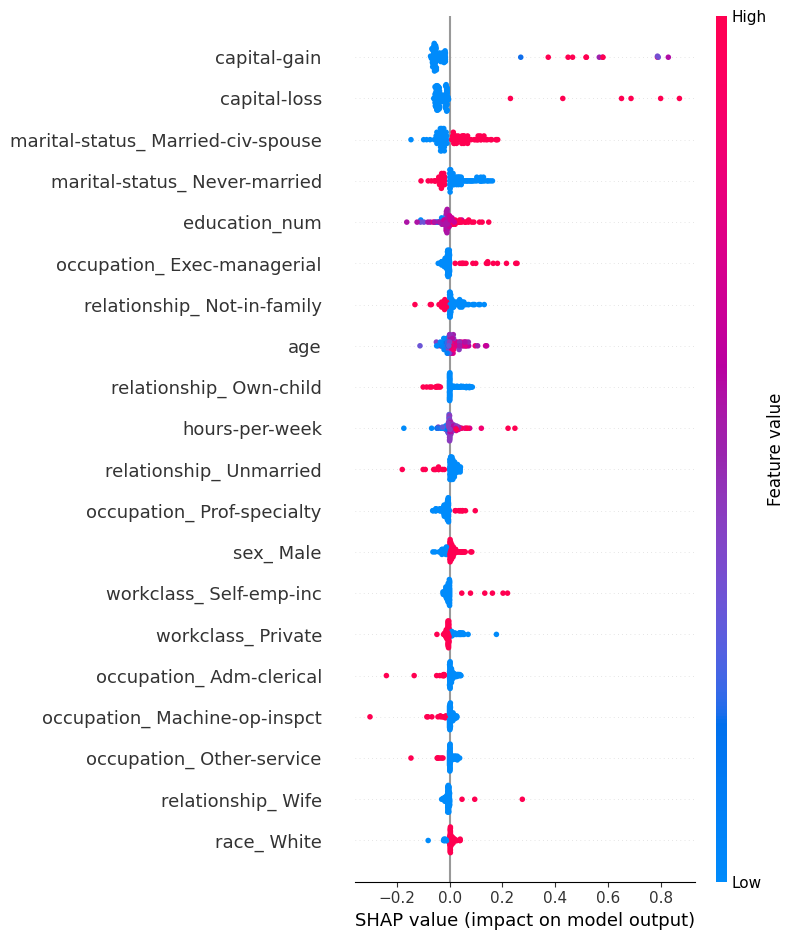

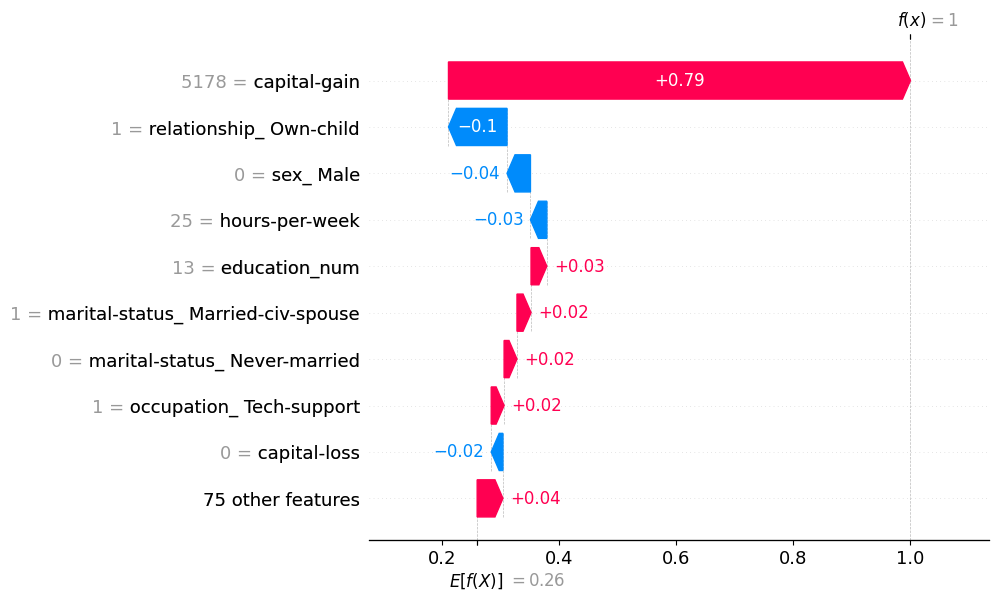

RandomForest


PermutationExplainer explainer: 101it [00:18,  2.56it/s]                         
C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


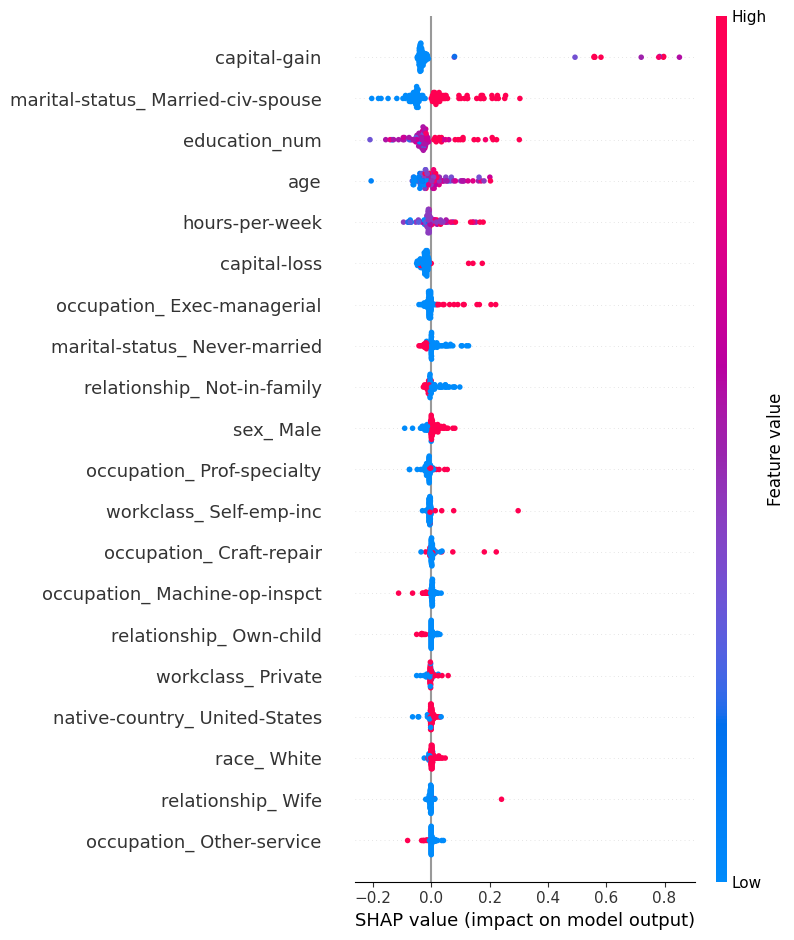

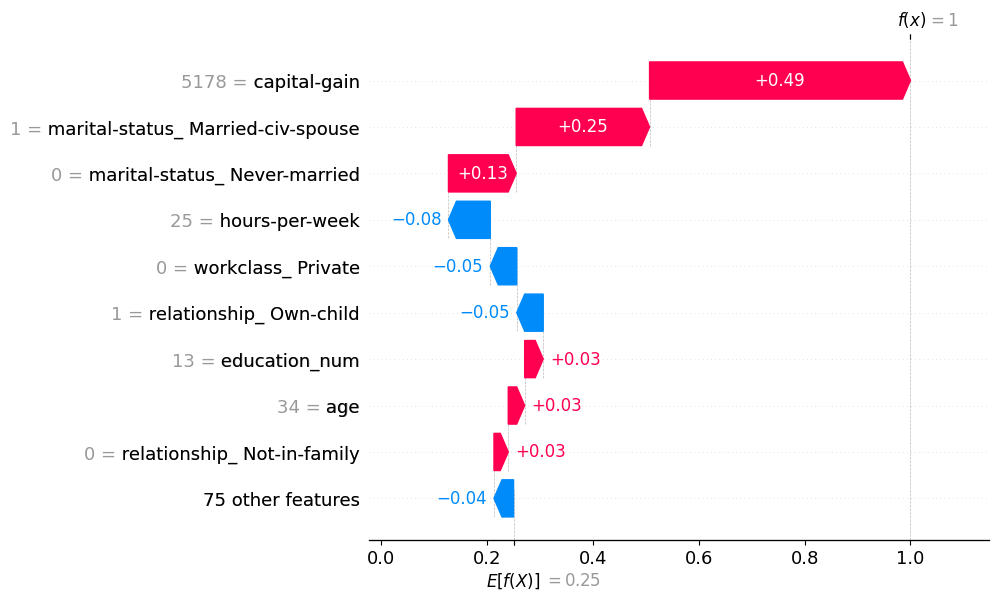

GradientBoosting


C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


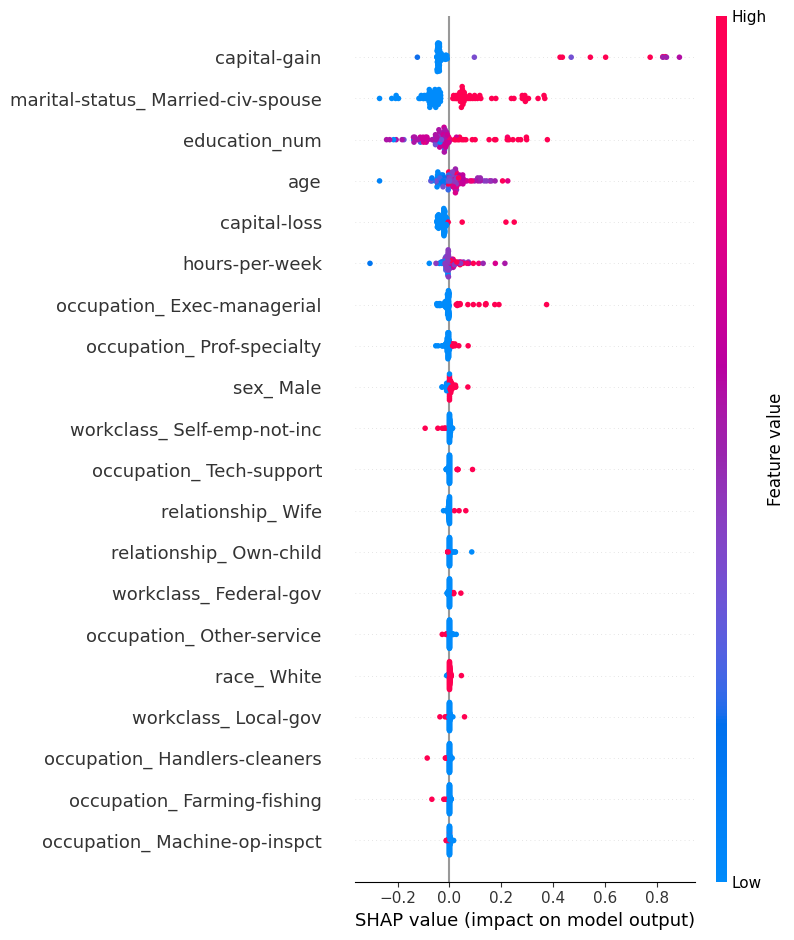

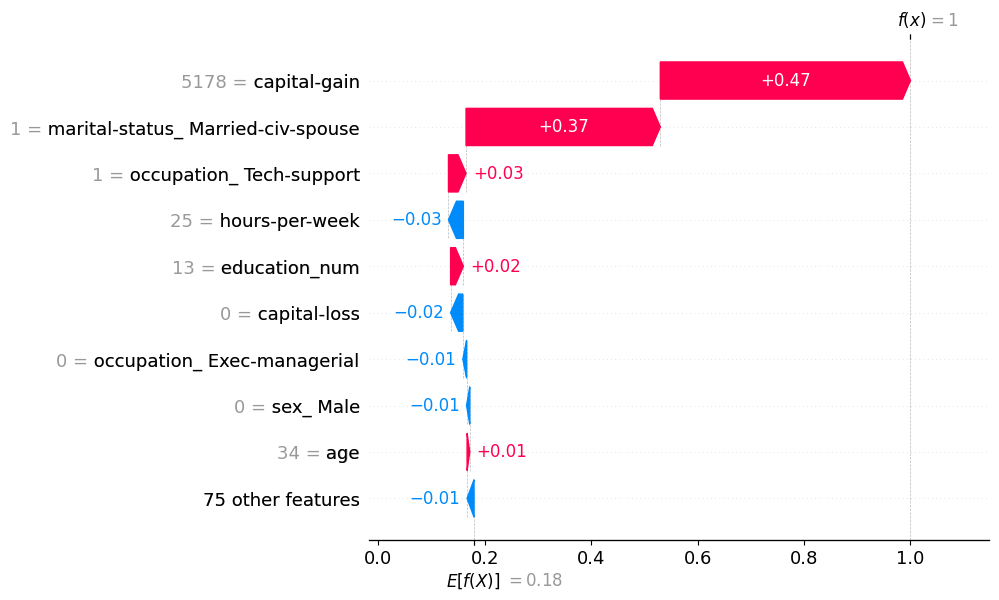

SVC


PermutationExplainer explainer: 101it [20:27, 12.27s/it]                         
C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


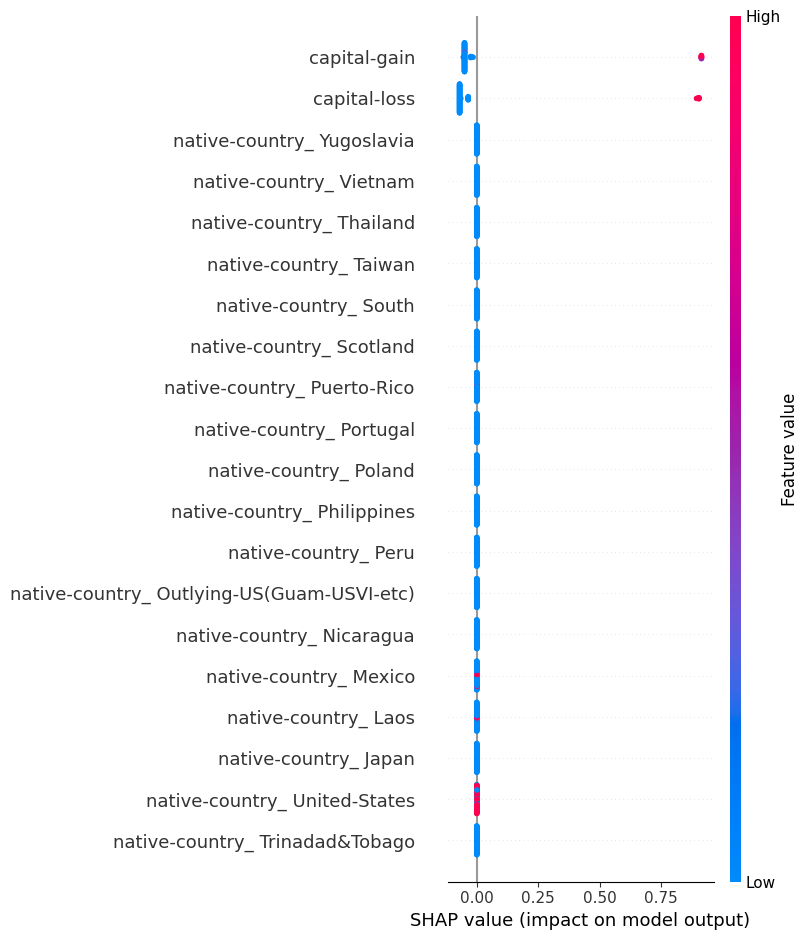

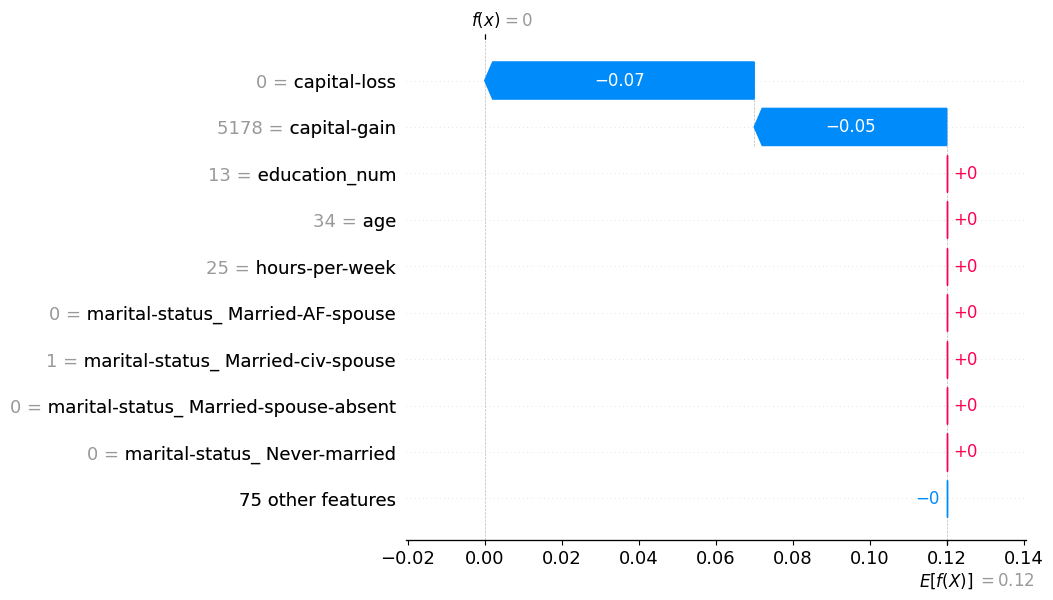

MLP


C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


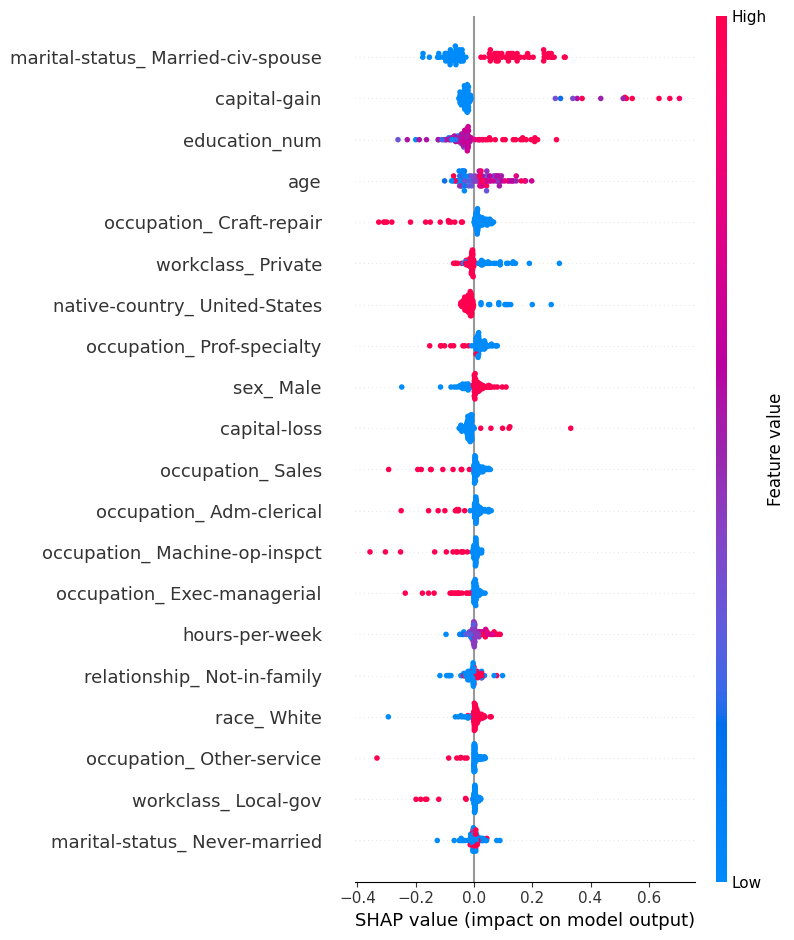

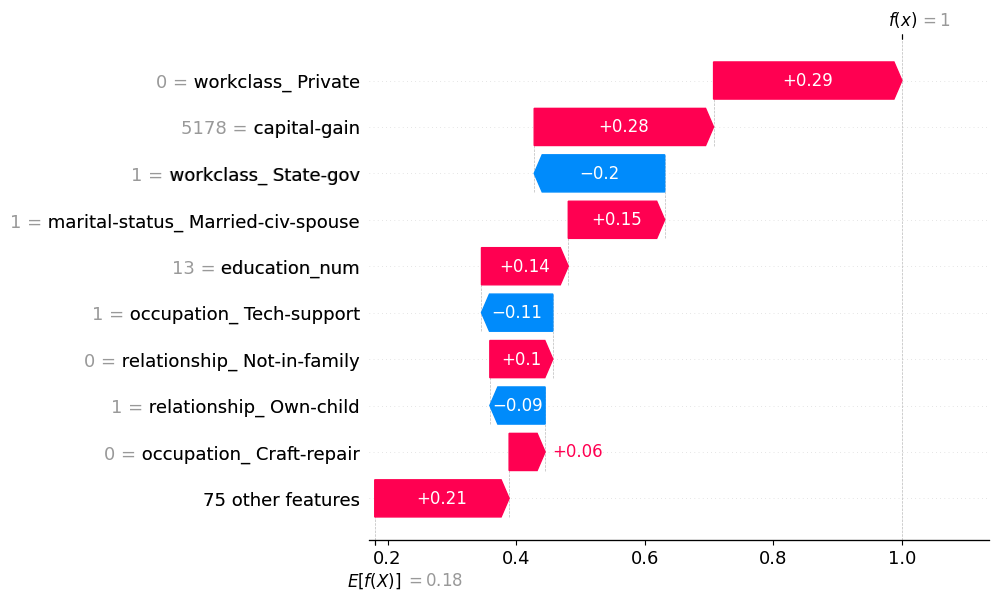

KNN


PermutationExplainer explainer: 101it [01:49,  1.20s/it]                         
C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_7604\3447477609.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


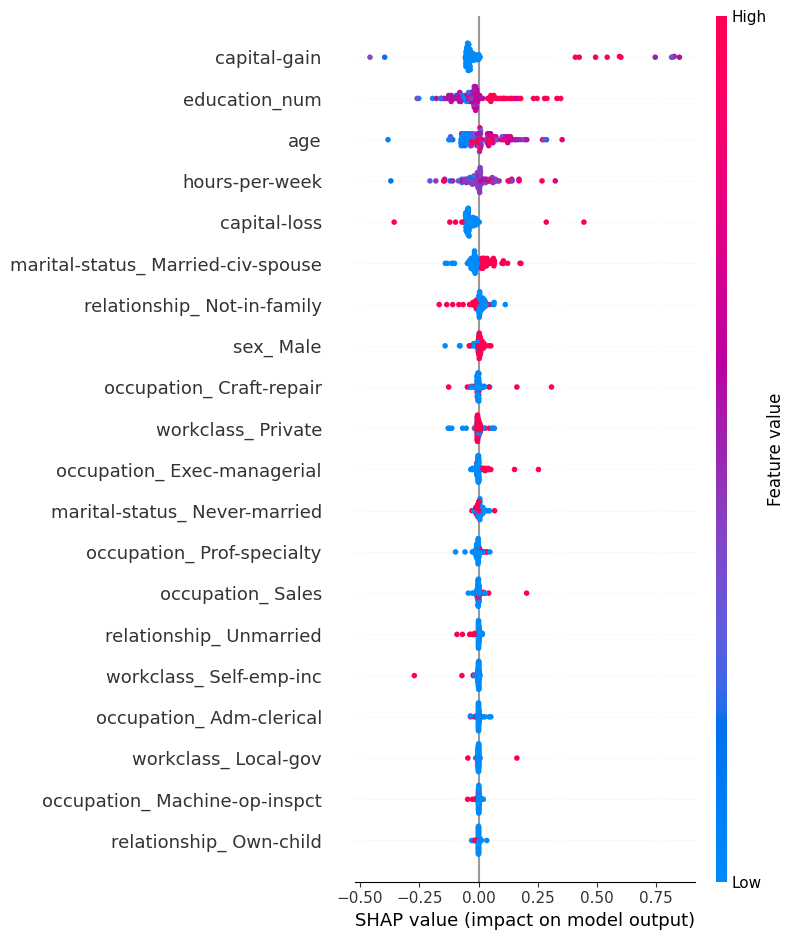

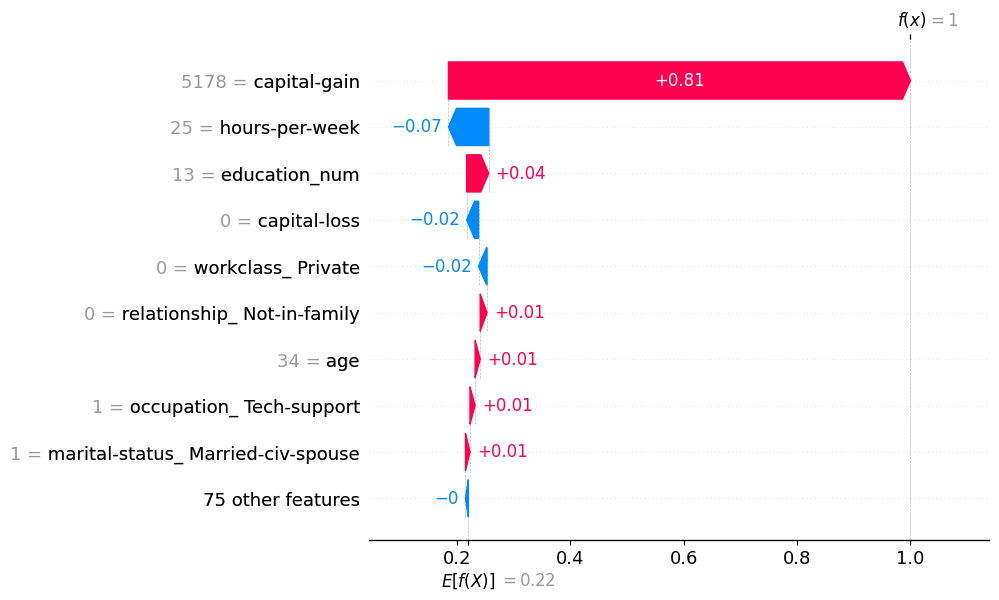

<Figure size 640x480 with 0 Axes>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
no_samples_train = 1000
no_samples_test = 100

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train, y_train)
    shap_explain(model, X_train[:no_samples_train], X_test[:no_samples_test], X.columns, model_name)
